In [16]:
import torch 
import json

edges = torch.load('../artifacts/biomarkers/graph_edges.pt')
gene_names = json.load(open('../artifacts/biomarkers/gene.json'))
top_10 = json.load(open('../artifacts/biomarkers/top_genes.json'))

In [17]:
top_10

['444', '248', '122', '101', '337', '121', '35', '4', '131', '286']

In [18]:
# print(edges[1464][[674 , 1468 , 1310 , 1340 , 260 , 931 , 1442 , 111, 1457]])
# print(edges[[674 , 1468 , 1310 , 1340 , 260 , 931 , 1442 , 111, 1457]][:,1464])

In [19]:
symmetric = (edges + edges.T) / 2 
symmetric = symmetric*(1 - torch.eye(symmetric.shape[0]))  # remove self edges
# print(symmetric[1464][[674 , 1468 , 1310 , 1340 , 260 , 931 , 1442 , 111, 1457]])

# mask value below 0.004 to 0 
# filter = 0.0045
# mask = (symmetric < filter).float()
# selected_symmetric = symmetric * (1 - mask)
# selected_symmetric.sum(dim=-1)

# count_nonzero = torch.count_nonzero(selected_symmetric , dim=-1).sum()
# print(count_nonzero)

# select top 200 genes 
top200 = symmetric.sum(dim=-1).topk(200).indices
graphs = []
edge_count = 0
for i in top200:
    node = {"name": "omic."+gene_names[i] , "score": symmetric[i].sum().item() , "top_10": str(i.item()) in top_10 , "imports": []}
    
    if str(i.item()) not in top_10:
        graphs.append(node)
        continue
        
    for j in range(0 , symmetric[i].shape[0]):
        #print(top200.tolist())
        if j in top200.tolist(): 
            if symmetric[i][j] > 0: #0.015:
                #if str(j) in top_10:
                node["imports"].append("omic."+gene_names[j])
                edge_count += 1
                
    graphs.append(node)
    
print(edge_count)

with open('./graph.json', 'w') as f:
    json.dump(graphs, f , indent=1)

786


In [247]:
values = []
for i in range(0, symmetric.shape[1]):
    if str(i) not in top_10:
        values.append(symmetric[1464][i].item())

In [135]:
# set the edges self to zero 
identity = torch.eye(edges.size(0)) 
# set the diagonal to zero
edges_removed = edges * (1 - identity)

Text(0, 0.5, 'Frequency')

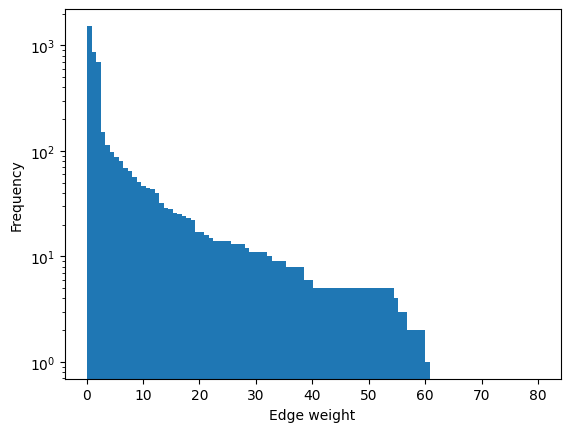

In [151]:
import matplotlib.pyplot as plt

# set the edges self to zero 
identity = torch.eye(edges.size(0)) 
# set the diagonal to zero
edges_removed = edges * (1 - identity)

plt.hist((edges.sum(dim=-1)).numpy() , bins=100, range=(0.1, 80) , cumulative=-1)
plt.yscale('log')
plt.xlabel('Edge weight')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

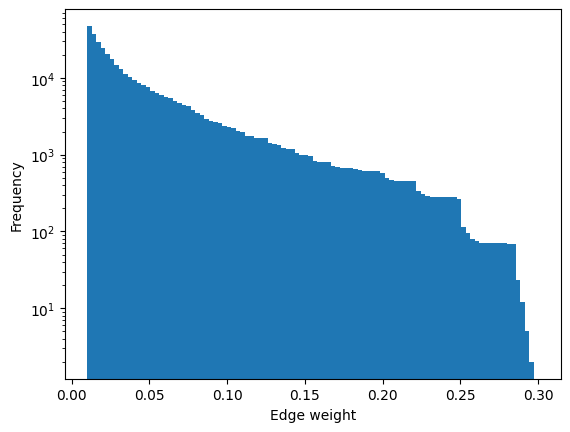

In [147]:
plt.hist(edges.view(-1).numpy() , bins=100, range=(0.01 , 0.3) , cumulative=-1)
plt.yscale('log')
plt.xlabel('Edge weight')
plt.ylabel('Frequency')

In [137]:
# top_10 = [str(x) for x in (edges_removed.sum(dim=-1)*torch.count_nonzero(edges_removed , dim=-1)).topk(10).indices.numpy() ]
# print(top_10)

In [138]:
for x in top_10:
    print(gene_names[int(x)])

mir122
KDR
mir126
TSPAN5
VEGFA
CDH5
PCDH12
LOC553137
AVPR1A
UBE2N


In [166]:
top_10

['1464', '674', '1468', '1310', '1340', '260', '931', '1422', '111', '1457']

In [234]:
symmetric = (edges + edges.T) / 2 
symmetric = symmetric*(1 - torch.eye(symmetric.shape[0]))  # remove self edges
selected = (symmetric.sum(dim = -1) > 1.8).nonzero()
mask_id = selected.squeeze().numpy()
print(len(mask_id))
selected_symmetric = symmetric[mask_id][:,mask_id]


# plt.hist(selected_symmetric.view(-1).numpy() , bins=100, range=(0.00 , 0.0125) , cumulative=-1)
# plt.yscale('log')
# plt.plot()

# mask value below 0.004 to 0 
filter = 0.008
mask = (selected_symmetric < filter).float()
selected_symmetric = selected_symmetric * (1 - mask)
selected_symmetric.sum(dim=-1)
count_nonzero = torch.count_nonzero(selected_symmetric , dim=-1).sum()
print(count_nonzero)

graphs = []
for i in range(0 , selected_symmetric.shape[0]):
    node = {"name":"omic."+gene_names[mask_id[i]] , "size": selected_symmetric[i].sum().item()  , "top_10": str(mask_id[i]) in top_10 , "imports": []}
    
    for j in range(0 , selected_symmetric.shape[1]):
        if selected_symmetric[i][j] > 0:
            node["imports"].append("omic."+ gene_names[mask_id[j]])
            
    graphs.append(node)
print(graphs)

with open('./graph.json', 'w') as f:
    json.dump(graphs, f , indent=1)

190
tensor(2588)
[{'name': 'omic.AGTRAP', 'size': 0.19884377717971802, 'top_10': False, 'imports': ['omic.BDKRB1', 'omic.ENPP3', 'omic.FAM184B', 'omic.FLJ37543', 'omic.GAK', 'omic.GAS6', 'omic.HS6ST3', 'omic.INSIG1', 'omic.LOC100131551', 'omic.LRP11', 'omic.MECP2', 'omic.MPPED2', 'omic.NPHP1', 'omic.NTN1', 'omic.PART1', 'omic.SEMA5B', 'omic.SNTB1', 'omic.ST3GAL1', 'omic.WNK3', 'omic.CLDN8', 'omic.LOC404266', 'omic.MIR759', 'omic.PA2G4P4']}, {'name': 'omic.ALDH3B1', 'size': 0.009465357288718224, 'top_10': False, 'imports': ['omic.FAM184B']}, {'name': 'omic.APH1B', 'size': 0.4492564797401428, 'top_10': False, 'imports': ['omic.ATG4D', 'omic.BCL2L2', 'omic.BDKRB1', 'omic.C16orf89', 'omic.CCDC103', 'omic.CNKSR3', 'omic.CPEB4', 'omic.EIF4E', 'omic.ENPP3', 'omic.EXPH5', 'omic.FBXO33', 'omic.FLJ42875', 'omic.GAK', 'omic.GAS6', 'omic.IFT172', 'omic.KIT', 'omic.LASP1', 'omic.LNX1', 'omic.LOC100131551', 'omic.LRP11', 'omic.LRRC14B', 'omic.MECP2', 'omic.MTSS1', 'omic.NKIRAS2', 'omic.NPHP1', 'omic

In [179]:
# build 
graphs = []
empty_nodes = 0
removed_low_score_nodes = []
selected = []

for i in range(0 , edges.size(0)):
    node = {"name": "omic." + gene_names[i] , "size": int(edges[i].sum()*torch.count_nonzero(edges[i])) , "top_10": str(i) in top_10 , "imports": []}
    
    for j in range(edges[i].size(0)):
        if edges[i][j] > 0:
            if i != j and str(j) not in top_10:
                node["imports"].append("omic." + gene_names[j])
    
    # if len(node["imports"]) == 0:
    #     empty_nodes += 1
    #     removed_nodes.append("omic." + gene_names[i])
    #     print("Empty node: " + str(i))
        
    if (edges[i].sum() * torch.count_nonzero(edges[i])) <= 25: 
        removed_low_score_nodes.append("omic." + gene_names[i])
        #print("Low score node: " + str(i))
    selected.append(i)
    graphs.append(node)
        
print("Removed node count: " + str(len(removed_low_score_nodes)))

Removed node count: 1075


In [180]:
# remove the low score nodes
filter_graphs = []
original_edges_count = 0
removed_edges_count = 0
for node in graphs: 
    if node["name"] in removed_low_score_nodes:
        # graphs.remove(node)
        continue 
    
    
    original_edges = len(node["imports"])
    original_edges_count += original_edges
    node['imports'] = [x for x in node['imports'] if x not in removed_low_score_nodes]
    removed_edges_count += (original_edges - len(node['imports']))
    
    filter_graphs.append(node)
    
print(f"Original edges count: {original_edges_count} , Removed edges count: {removed_edges_count}, Remaining edges: {original_edges_count - removed_edges_count}")

# # remove the neighbour that are removed 
# check_incomming = {k:0 for k in removed_nodes}
# for node in graphs: 
#     # node["imports"] = [x for x in node["imports"] if x not in removed_nodes]
#     for outgoing in node["imports"]:
#         if outgoing in check_incomming:
#             check_incomming[outgoing] += 1

Original edges count: 94837 , Removed edges count: 15188, Remaining edges: 79649


In [178]:
import json 
with open('./graph.json', 'w') as f:
    json.dump(filter_graphs, f , indent=1)

In [129]:
count_dict = {graph['name']:len(graph['imports']) for graph in filter_graphs }
sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

[('omic.DOK4', 6),
 ('omic.OCIAD2', 6),
 ('omic.SPATS2L', 6),
 ('omic.TCTN1', 6),
 ('omic.TCTN2', 6),
 ('omic.ATP5G2', 6),
 ('omic.HOXD8', 6),
 ('omic.LOC553137', 6),
 ('omic.MGP', 6),
 ('omic.NPY', 6),
 ('omic.SOCS1', 6),
 ('omic.VMO1', 6),
 ('omic.ADIPOR2', 5),
 ('omic.ANKRD9', 5),
 ('omic.ATG4D', 5),
 ('omic.BCL2L2', 5),
 ('omic.C1orf88', 5),
 ('omic.CCDC103', 5),
 ('omic.CLDN8', 5),
 ('omic.CNKSR3', 5),
 ('omic.COL23A1', 5),
 ('omic.DHX40', 5),
 ('omic.ENPP3', 5),
 ('omic.GAK', 5),
 ('omic.GAS6', 5),
 ('omic.HAGHL', 5),
 ('omic.KDR', 5),
 ('omic.KIT', 5),
 ('omic.LOC100131551', 5),
 ('omic.MAPKSP1', 5),
 ('omic.MTSS1', 5),
 ('omic.NPHP1', 5),
 ('omic.NTN1', 5),
 ('omic.NUDT22', 5),
 ('omic.PART1', 5),
 ('omic.PLEKHJ1', 5),
 ('omic.SEMA5B', 5),
 ('omic.SLC39A13', 5),
 ('omic.SSH2', 5),
 ('omic.ST8SIA5', 5),
 ('omic.SYNGR2', 5),
 ('omic.SYT7', 5),
 ('omic.TMEM129', 5),
 ('omic.TRAPPC6B', 5),
 ('omic.TSPAN5', 5),
 ('omic.VEGFA', 5),
 ('omic.EMX2OS', 5),
 ('omic.EPGN', 5),
 ('omic.LOC1

Text(0, 0.5, 'Frequency')

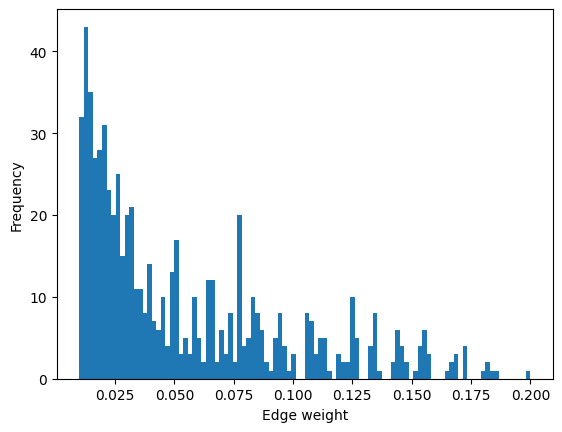

In [108]:
import matplotlib.pyplot as plt

plt.hist(edges[selected , selected].view(-1).numpy() , bins=100, range=(0.01 , 0.2))
#plt.yscale('log')
plt.xlabel('Edge weight')
plt.ylabel('Frequency')



In [16]:
torch.eye(10)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Text(0, 0.5, 'Frequency')

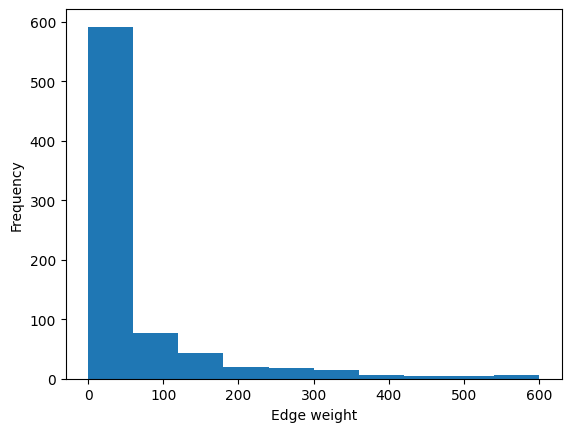

In [76]:
import matplotlib.pyplot as plt

# set the edges self to zero 
identity = torch.eye(edges.size(0)) 
# set the diagonal to zero
edges_removed = edges * (1 - identity)

plt.hist((edges_removed.sum(dim=-1) * torch.count_nonzero(edges_removed , dim=-1)).numpy() , bins=10, range=(0.1, 600))
#plt.yscale('log')
plt.xlabel('Edge weight')
plt.ylabel('Frequency')

In [2]:
# plot the graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i , edge_value in enumerate(edges[444].numpy()):
    G.add_node(i)
    
    if edge_value > 0:
        G.add_edge(444, i, weight=edge_value)


ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (2, 3)

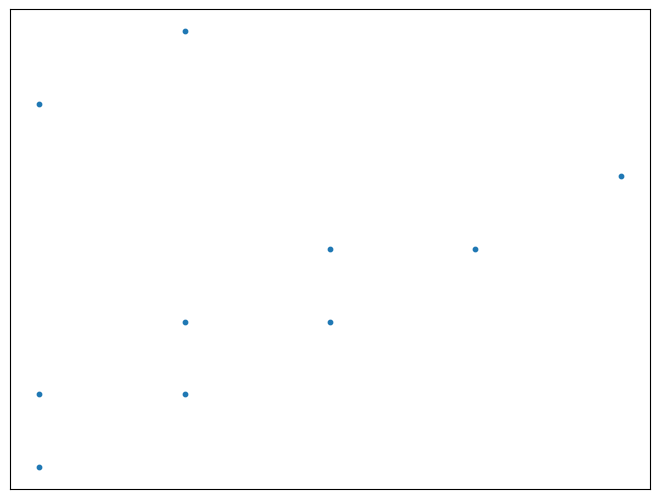

In [3]:
# hide isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

# draw the graph
pos = nx.petersen_graph(G)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [33]:
import torch 
import os 
from pathlib import Path

# list available files from a directory
def list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

test_dir = Path("../biomarkers/BRCA/prior")
available_files = list_files(test_dir)

In [34]:
edge_list = [torch.load(test_dir / f) for f in available_files]

In [45]:
common_genes = set()
print(edge_list[0].keys())

for i , sample in enumerate(edge_list):
    if i == 0:
        common_genes = set(sample['gene_names'])
        continue 
    
    common_genes = common_genes.intersection(set(sample['gene_names']))
    
print("Common genes: " + str(len(common_genes)))
common_genes = list(common_genes)

edges = []
for sample in edge_list:
    gene_idx = []
    for gene in common_genes:
        gene_idx.append(sample['gene_names'].index(gene))
        
    edge = sample['edges_score'][gene_idx][:,gene_idx]
    # remove self edges 
    edge = edge * (1 - torch.eye(edge.size(0)))
    # normalize the edge 
    # edge = edge / edge.max()
    edge = torch.nn.functional.normalize(edge)
    edges.append(edge)
    
edges = torch.stack(edges)
print(edges.shape)

for i in edges.sum(dim=0).sum(dim=-1).topk(100).indices: 
    print(common_genes[i])

dict_keys(['edges_score', 'gene_names'])
Common genes: 252
torch.Size([5, 252, 252])
FOXC1
ESR1
FOXA1
MIR563
AGR3
GPR77
GATA3
TBC1D9
mir934
XBP1
LOC145837
IL34
CA12
ANXA9
SLC44A4
C6orf97
MLPH
CCDC125
CMBL
THSD4
ZNF552
SLC22A5
GREB1
ARSG
ABAT
DNALI1
CDH3
SPDEF
LOC100130331
GPR160
ARL4C
SIDT1
TRIM29
CSDA
mir190b
SLC7A8
RUNX3
CCDC82
MIA
MAPT
INGX
EPHA2
BCL11A
SUSD3
SOX10
MPHOSPH6
SFRP1
AFF3
NCOA7
IVD
CHST3
PLAGL1
BCL2
C4orf34
RNF145
TLE4
HAPLN3
VGLL1
S1PR2
MICALL1
GABRP
FAM63A
UGT2B11
FAM171A1
SCPEP1
PTX3
TMEM86A
CNTNAP3
RRM2
DUSP7
mir516a2
PRNP
TRPV6
SEC14L4
MALL
HRK
mir1052
LOC84856
SIRPA
PPM1F
TMPRSS12
mir765
mir519a1
PLEKHG1
PSAT1
SOX11
SPEF2
C16orf57
PADI2
IFFO2
KLHDC1
MMP7
mir522
PHF15
WDR19
FZD7
ARHGEF4
MID1
BBOX1
DNMT3B


In [44]:
torch.nn.functional.normalize(torch.randn(3,3),p=2, dim=1)

tensor([[-0.7079, -0.0780,  0.7020],
        [ 0.7489, -0.0489, -0.6609],
        [-0.7526, -0.5580,  0.3497]])